In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. Viết hàm load_data() để tải dữ liệu lên ứng dụng
def load_data(file_path="titanic_disaster.csv"):
    data = pd.read_csv(file_path)
    print("10 dòng đầu tiên của dữ liệu:")
    print(data.head(10))
    return data

df = load_data()

10 dòng đầu tiên của dữ liệu:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCar


Số lượng giá trị thiếu trên từng cột:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


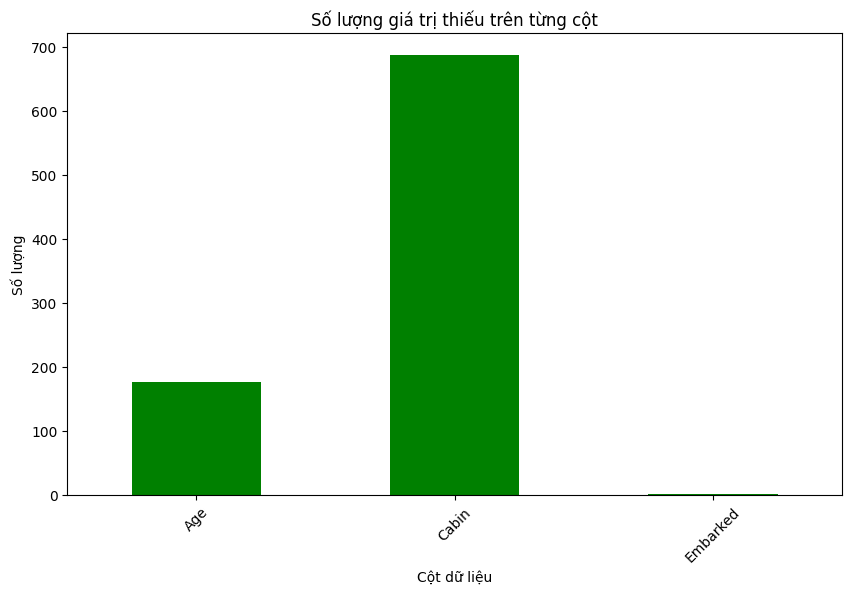

In [9]:
# 2. Thống kê dữ liệu thiếu và trực quan hóa bằng heat map
def missing_data_analysis(df):
    print("\nSố lượng giá trị thiếu trên từng cột:")
    print(df.isnull().sum())

    # Vẽ biểu đồ cột để trực quan hóa dữ liệu thiếu
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]

    plt.figure(figsize=(10,6))
    missing_counts.plot(kind='bar', color='green')
    plt.title('Số lượng giá trị thiếu trên từng cột')
    plt.ylabel('Số lượng')
    plt.xlabel('Cột dữ liệu')
    plt.xticks(rotation=45)
    plt.show()

missing_data_analysis(df)

In [10]:
# 3. Xử lý cột Name, tách thành firstName và secondName
def process_name(data):
    data_copy = data.copy()

    # Tách họ và tên
    # Giả định format: Last name, First name (Title)
    data_copy['secondName'] = data_copy['Name'].apply(lambda x: x.split(',')[0].strip())
    data_copy['firstName'] = data_copy['Name'].apply(lambda x: ' '.join(x.split(',')[1].split()[1:]).strip())

    # Xóa cột Name
    data_copy.drop('Name', axis=1, inplace=True)

    print("\nDữ liệu sau khi tách cột Name:")
    print(data_copy.head())

    return data_copy

df = process_name(df)


Dữ liệu sau khi tách cột Name:
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked secondName  \
0         A/5 21171   7.2500   NaN        S     Braund   
1          PC 17599  71.2833   C85        C    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3            113803  53.1000  C123        S   Futrelle   
4            373450   8.0500   NaN        S      Allen   

                               firstName  
0                            Owen Harris  
1  John Bradley (Florence Briggs Thayer)  
2                                  Laina  
3          Jacques Heath (Lily May Peel)  
4                  

In [11]:
# 4. Xử lý rút gọn kích thước dữ liệu trên cột Sex
def process_sex(data):

    data_copy = data.copy()
    data_copy['Sex'] = data_copy['Sex'].replace({'male': 'M', 'female': 'F'})

    print("\nDữ liệu sau khi thay thế giá trị trong cột Sex:")
    print(data_copy['Sex'].value_counts())

    return data_copy

df = process_sex(df)


Dữ liệu sau khi thay thế giá trị trong cột Sex:
Sex
M    577
F    314
Name: count, dtype: int64


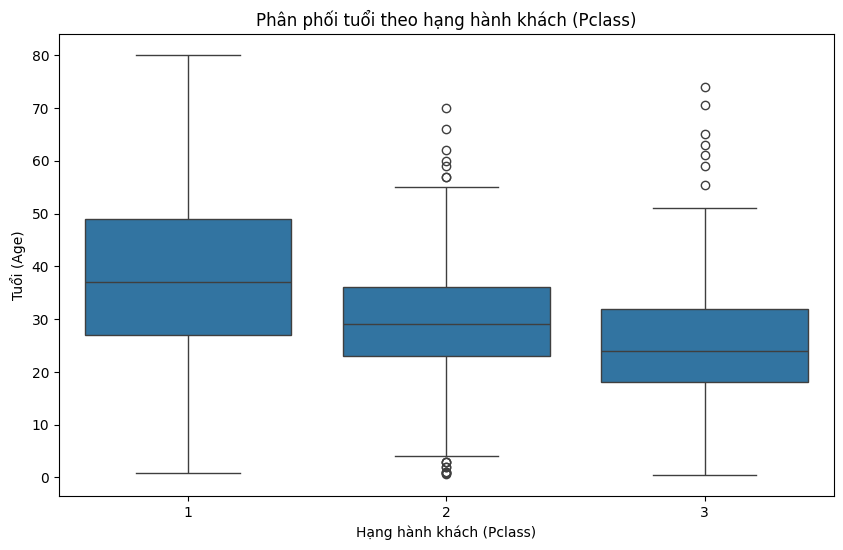


Tuổi trung bình theo hạng hành khách:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Nhận xét về tuổi trung bình giữa các nhóm hành khách:
- Hạng 1 (Pclass=1): Có tuổi trung bình cao nhất
- Hạng 3 (Pclass=3): Có tuổi trung bình thấp nhất
- Có sự khác biệt đáng kể về tuổi giữa các hạng hành khách
=> Quyết định: Thay thế giá trị Age bị thiếu theo từng nhóm hạng vé (Pclass)

Thống kê dữ liệu sau khi xử lý Age:
count    891.000000
mean      29.292875
std       13.210527
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


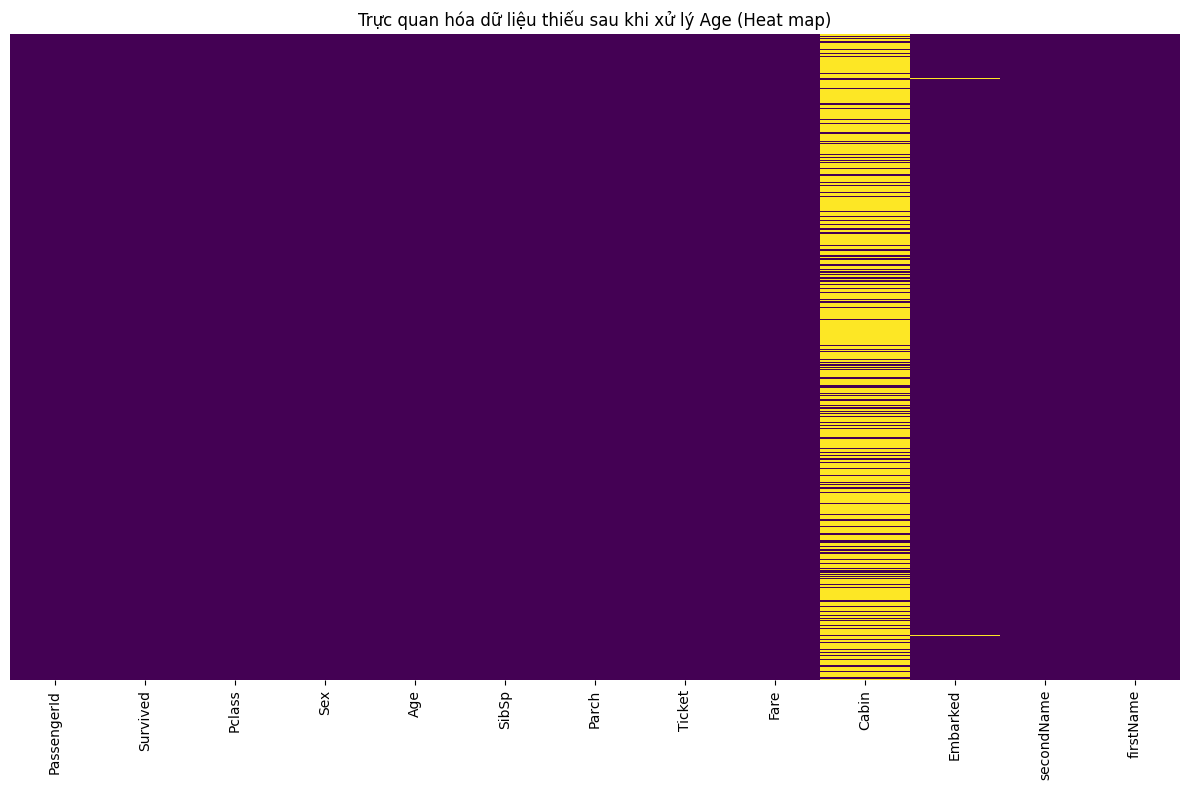

In [12]:
# 5. Xử lý dữ liệu thiếu trên biến Age
def process_missing_age(data):
    data_copy = data.copy()

    # a. Vẽ biểu đồ Box plot để xác định phân phối tuổi theo từng hạng hành khách
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pclass', y='Age', data=data_copy)
    plt.title('Phân phối tuổi theo hạng hành khách (Pclass)')
    plt.xlabel('Hạng hành khách (Pclass)')
    plt.ylabel('Tuổi (Age)')
    plt.show()

    # Hiển thị thống kê tuổi trung bình theo từng hạng hành khách
    age_means = data_copy.groupby('Pclass')['Age'].mean()
    print("\nTuổi trung bình theo hạng hành khách:")
    print(age_means)

    # Nhận xét về tuổi trung bình giữa các nhóm hành khách
    print("\nNhận xét về tuổi trung bình giữa các nhóm hành khách:")
    print("- Hạng 1 (Pclass=1): Có tuổi trung bình cao nhất")
    print("- Hạng 3 (Pclass=3): Có tuổi trung bình thấp nhất")
    print("- Có sự khác biệt đáng kể về tuổi giữa các hạng hành khách")
    print("=> Quyết định: Thay thế giá trị Age bị thiếu theo từng nhóm hạng vé (Pclass)")

    # b. Tiến hành thay thế giá trị Age bị thiếu theo từng nhóm Pclass
    for pclass in [1, 2, 3]:
        mean_age = age_means[pclass]
        data_copy.loc[(data_copy['Pclass'] == pclass) & (data_copy['Age'].isnull()), 'Age'] = mean_age
    # Hiển thị kết quả dạng bảng
    print("\nThống kê dữ liệu sau khi xử lý Age:")
    print(data_copy['Age'].describe())
    # Vẽ heat map để hiển thị dữ liệu thiếu sau khi xử lý
    plt.figure(figsize=(12, 8))
    sns.heatmap(data_copy.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Trực quan hóa dữ liệu thiếu sau khi xử lý Age (Heat map)')
    plt.tight_layout()
    plt.show()
    return data_copy
df = process_missing_age(df)

In [13]:
# 6. Xây dựng biến số Agegroup
def create_age_group(data):

    data_copy = data.copy()

    # Tạo biến Agegroup dựa trên độ tuổi
    conditions = [
        (data_copy['Age'] <= 12),
        (data_copy['Age'] > 12) & (data_copy['Age'] <= 18),
        (data_copy['Age'] > 18) & (data_copy['Age'] <= 60),
        (data_copy['Age'] > 60)
    ]

    values = ['Kid', 'Teen', 'Adult', 'Older']

    data_copy['Agegroup'] = np.select(conditions, values, default='Unknown').astype(str)

    print("\nPhân phối các nhóm tuổi:")
    print(data_copy['Agegroup'].value_counts())

    return data_copy

df = create_age_group(df)


Phân phối các nhóm tuổi:
Agegroup
Adult    730
Teen      70
Kid       69
Older     22
Name: count, dtype: int64


In [15]:
# 7. Thêm đặc trưng về danh xưng (namePrefix)
def extract_name_prefix(data):

    data_copy = data.copy()

    def get_title(name):
        pattern = r',\s*([^.]+)\.'
        match = re.search(pattern, name)
        if match:
            return match.group(1).strip()
        return ''

    if 'Name' not in data_copy.columns:
        data_copy['Name'] = data_copy['secondName'] + ', ' + data_copy['firstName']

    data_copy['namePrefix'] = data_copy['Name'].apply(get_title)

    common_titles = ['Mr', 'Mrs', 'Miss', 'Master']
    data_copy['namePrefix'] = data_copy['namePrefix'].apply(lambda x: x if x in common_titles else 'Other')

    # Xóa cột Name nếu đã tạo lại
    if 'Name' in data_copy.columns and 'Name' not in data.columns:
        data_copy.drop('Name', axis=1, inplace=True)

    print("\nPhân phối các danh xưng:")
    print(data_copy['namePrefix'].value_counts())

    return data_copy

df = extract_name_prefix(df)


Phân phối các danh xưng:
namePrefix
Other    891
Name: count, dtype: int64


In [16]:
# 8. Khai thác thông tin số lượng thành viên đi theo nhóm thân quen (familySize)
def calculate_family_size(data):
    data_copy = data.copy()

    # Tính family size = 1 + SibSp + Parch
    data_copy['familySize'] = 1 + data_copy['SibSp'] + data_copy['Parch']

    print("\nThống kê family size:")
    print(data_copy['familySize'].describe())
    print("\nPhân phối family size:")
    print(data_copy['familySize'].value_counts().sort_index())

    return data_copy

df = calculate_family_size(df)


Thống kê family size:
count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: familySize, dtype: float64

Phân phối family size:
familySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


In [17]:
# 9. Tạo thêm đặc trưng 'Alone'
def create_alone_feature(data):
    data_copy = data.copy()

    # Tạo đặc trưng Alone: 1 nếu familySize = 1 (đi một mình), 0 nếu không
    data_copy['Alone'] = (data_copy['familySize'] == 1).astype(int)

    print("\nPhân phối đặc trưng Alone:")
    print(data_copy['Alone'].value_counts())

    return data_copy

df = create_alone_feature(df)


Phân phối đặc trưng Alone:
Alone
1    537
0    354
Name: count, dtype: int64


In [18]:
# 10. Tách loại cabin
def extract_cabin_type(data):
    data_copy = data.copy()

    # Thay thế giá trị NaN trong Cabin bằng "Unknown"
    data_copy['Cabin'] = data_copy['Cabin'].fillna("Unknown")

    # Trích xuất loại cabin (chữ cái đầu tiên)
    data_copy['typeCabin'] = data_copy['Cabin'].apply(lambda x: x[0] if x != "Unknown" else "Unknown")

    print("\nPhân phối các loại cabin:")
    print(data_copy['typeCabin'].value_counts())

    return data_copy

df = extract_cabin_type(df)


Phân phối các loại cabin:
typeCabin
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'secondName', 'firstName',
       'Agegroup', 'namePrefix', 'familySize', 'Alone', 'typeCabin'],
      dtype='object')
   PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3   M  22.0      1      0         A/5 21171   
1            2         1       1   F  38.0      1      0          PC 17599   
2            3         1       3   F  26.0      0      0  STON/O2. 3101282   
3            4         1       1   F  35.0      1      0            113803   
4            5         0       3   M  35.0      0      0            373450   

      Fare    Cabin Embarked secondName  \
0   7.2500  Unknown        S     Braund   
1  71.2833      C85        C    Cumings   
2   7.9250  Unknown        S  Heikkinen   
3  53.1000     C123        S   Futrelle   
4   8.0500  Unknown        S      Allen   

                               

<ipython-input-19-c616d531a196>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("Unknown", inplace=True)  # Xử lý giá trị thiếu nếu có


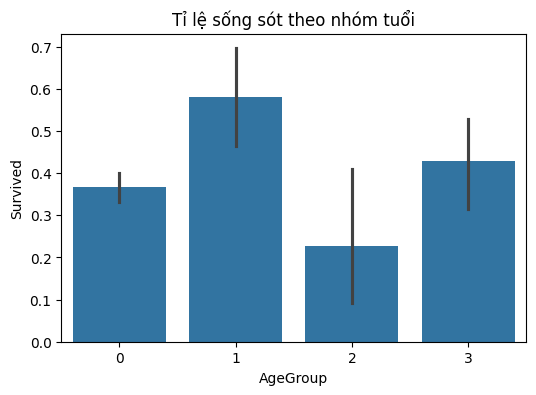

In [19]:
# 11.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

print(df.columns)  # Kiểm tra danh sách cột trong df
print(df.head())   # Xem trước vài dòng đầu của dữ liệu

bins = [0, 12, 18, 60, np.inf]
labels = ['Kid', 'Teen', 'Adult', 'Older']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Đảm bảo các cột cần mã hóa tồn tại trong dữ liệu
df["Embarked"].fillna("Unknown", inplace=True)  # Xử lý giá trị thiếu nếu có

# Mã hóa biến phân loại
le = LabelEncoder()

df["AgeGroup"] = le.fit_transform(df["AgeGroup"])
df["namePrefix"] = le.fit_transform(df["namePrefix"])  # Sử dụng đúng tên cột đã tạo từ câu 7
df["Embarked"] = le.fit_transform(df["Embarked"])
df["Sex"] = le.fit_transform(df["Sex"])  # Chuyển đổi 'M' và 'F' thành số

# Lựa chọn biến đầu vào (features) và nhãn (target)
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "familySize", "AgeGroup", "namePrefix"]
X = df[features]
y = df["Survived"]

# Chia dữ liệu thành tập train và test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Áp dụng cùng scaler cho tập test

print("Dữ liệu đã được mã hóa và chuẩn hóa thành công!")

plt.figure(figsize=(6,4))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Tỉ lệ sống sót theo nhóm tuổi')
plt.show()

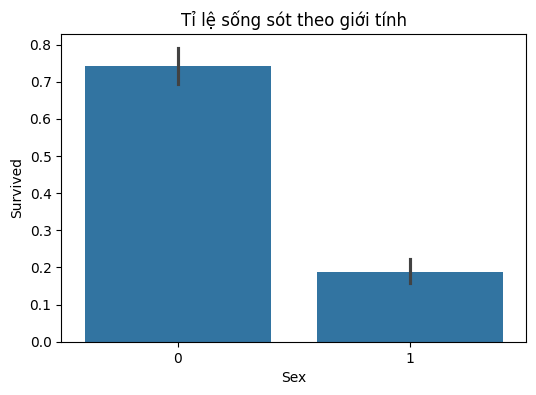

In [20]:
# 12. Trực quan hóa tỉ lệ sống sót theo giới tính
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Tỉ lệ sống sót theo giới tính')
plt.show()

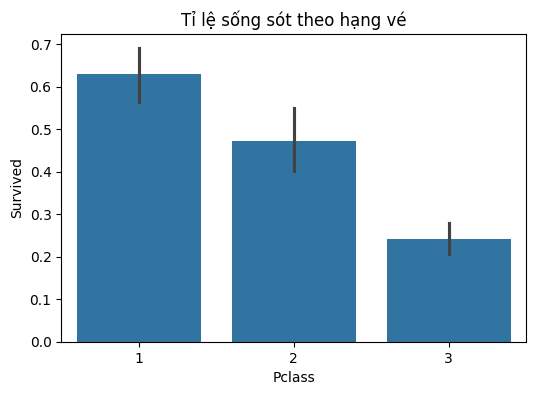

In [21]:
# 13. Trực quan hóa sống sót theo hạng vé
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Tỉ lệ sống sót theo hạng vé')
plt.show()

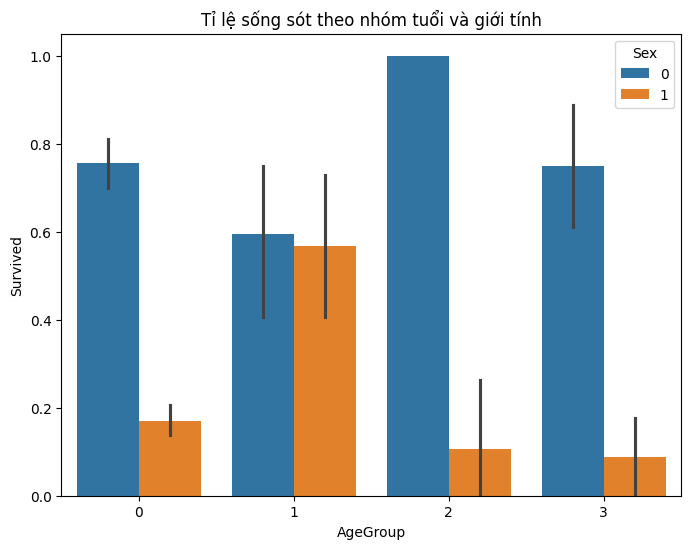

In [22]:
# 14. Sống sót theo giới tính và nhóm tuổi
plt.figure(figsize=(8,6))
sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=df)
plt.title('Tỉ lệ sống sót theo nhóm tuổi và giới tính')
plt.show()

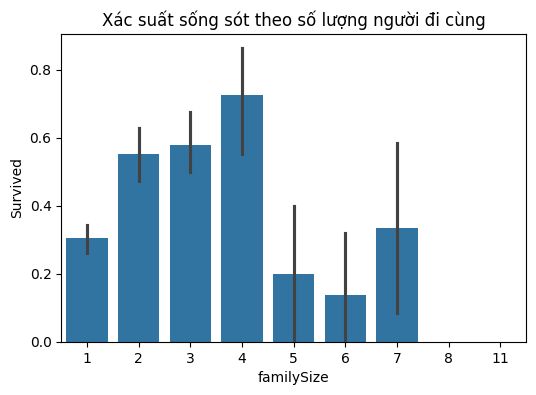

In [23]:
# 15. Xác suất sống sót dựa trên nhóm đi cùng
plt.figure(figsize=(6,4))
sns.barplot(x='familySize', y='Survived', data=df)
plt.title('Xác suất sống sót theo số lượng người đi cùng')
plt.show()

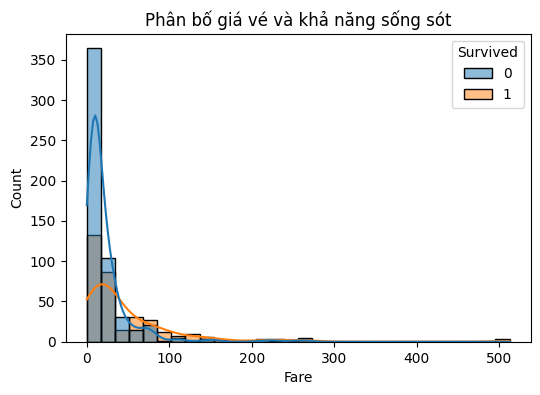

In [24]:
# 16. Xác suất sống sót dựa trên giá vé
plt.figure(figsize=(6,4))
sns.histplot(df, x='Fare', hue='Survived', kde=True, bins=30)
plt.title('Phân bố giá vé và khả năng sống sót')
plt.show()

<Figure size 800x600 with 0 Axes>

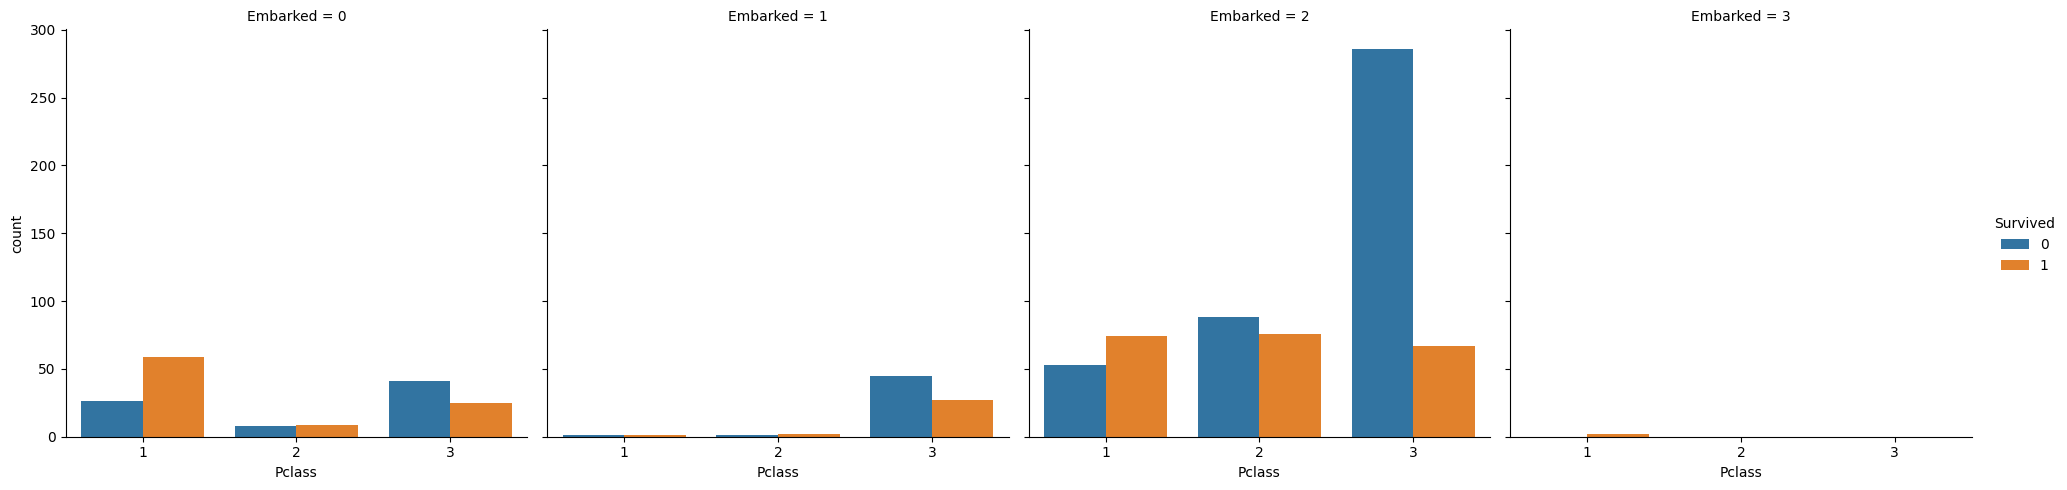

In [25]:
# 17. Số người sống sót theo hạng vé và cảng lên tàu
plt.figure(figsize=(8,6))
sns.catplot(x='Pclass', hue='Survived', col='Embarked', kind='count', data=df)
plt.show()
